In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt, mpld3
import terminalLogic
from terminalLogic import Algo
import client
from client import engine
from typing import Optional, Dict, Any, List
from ciso8601 import parse_datetime
from requests import Request, Session, Response
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib.animation import FuncAnimation
from mpld3 import plugins

In [2]:
url = engine()
data = url.getData()
df = data
df

,time,open,high,low,close,volume
0,2021-10-13 23:13:00,57353.0,57369.0,57353.0,57366.0,111732.7575
1,2021-10-13 23:14:00,57366.0,57387.0,57366.0,57387.0,72399.0657
2,2021-10-13 23:15:00,57387.0,57390.0,57371.0,57387.0,113329.9159
3,2021-10-13 23:16:00,57387.0,57403.0,57361.0,57400.0,249379.5464
4,2021-10-13 23:17:00,57400.0,57402.0,57356.0,57362.0,134386.3855
...,...,...,...,...,...,...
1495,2021-10-15 00:08:00,57146.0,57215.0,57146.0,57202.0,461400.4698
1496,2021-10-15 00:09:00,57203.0,57229.0,57167.0,57217.0,163156.8949
1497,2021-10-15 00:10:00,57217.0,57267.0,57215.0,57267.0,353457.7092
1498,2021-10-15 00:11:00,57267.0,57316.0,57226.0,57316.0,231674.5908


In [3]:
df

,time,open,high,low,close,volume
0,2021-10-13 23:13:00,57353.0,57369.0,57353.0,57366.0,111732.7575
1,2021-10-13 23:14:00,57366.0,57387.0,57366.0,57387.0,72399.0657
2,2021-10-13 23:15:00,57387.0,57390.0,57371.0,57387.0,113329.9159
3,2021-10-13 23:16:00,57387.0,57403.0,57361.0,57400.0,249379.5464
4,2021-10-13 23:17:00,57400.0,57402.0,57356.0,57362.0,134386.3855
...,...,...,...,...,...,...
1495,2021-10-15 00:08:00,57146.0,57215.0,57146.0,57202.0,461400.4698
1496,2021-10-15 00:09:00,57203.0,57229.0,57167.0,57217.0,163156.8949
1497,2021-10-15 00:10:00,57217.0,57267.0,57215.0,57267.0,353457.7092
1498,2021-10-15 00:11:00,57267.0,57316.0,57226.0,57316.0,231674.5908


In [4]:
df1 = Algo.fullstate(df, df)
df1.dropna(inplace=True)
df2 = df1
df2

,time,open,high,low,close,volume,9-min,21-min,signal,market_returns,trend_returns,entry,ma,ratio,position,entryR,range_returns,sign
64,2021-10-14 00:17:00,57601.0,57602.0,57531.0,57532.0,213010.9555,57482.000000,57454.000000,1.0,-0.001199,0.001129,0.0,57482.000000,1.000870,-1.0,0.0,0.001199,-1.0
65,2021-10-14 00:18:00,57532.0,57543.0,57463.0,57466.0,503127.3352,57490.333333,57459.523810,1.0,-0.001148,-0.001199,0.0,57490.333333,0.999577,-1.0,0.0,0.001148,-1.0
66,2021-10-14 00:19:00,57466.0,57492.0,57412.0,57425.0,351699.2292,57491.333333,57461.714286,1.0,-0.000714,-0.001148,0.0,57491.333333,0.998846,-1.0,0.0,0.000714,-1.0
67,2021-10-14 00:20:00,57425.0,57430.0,57410.0,57410.0,266954.3977,57488.000000,57462.952381,1.0,-0.000261,-0.000714,0.0,57488.000000,0.998643,-1.0,0.0,0.000261,-1.0
68,2021-10-14 00:21:00,57411.0,57411.0,57387.0,57387.0,230217.9936,57483.333333,57464.285714,1.0,-0.000401,-0.000261,0.0,57483.333333,0.998324,-1.0,0.0,0.000401,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2021-10-15 00:08:00,57146.0,57215.0,57146.0,57202.0,461400.4698,57267.444444,57323.619048,-1.0,0.000979,0.000612,0.0,57267.444444,0.998857,1.0,0.0,0.000979,-1.0
1496,2021-10-15 00:09:00,57203.0,57229.0,57167.0,57217.0,163156.8949,57249.888889,57313.380952,-1.0,0.000262,-0.000979,0.0,57249.888889,0.999426,1.0,0.0,0.000262,-1.0
1497,2021-10-15 00:10:00,57217.0,57267.0,57215.0,57267.0,353457.7092,57237.888889,57304.952381,-1.0,0.000873,-0.000262,0.0,57237.888889,1.000509,1.0,0.0,0.000873,-1.0
1498,2021-10-15 00:11:00,57267.0,57316.0,57226.0,57316.0,231674.5908,57229.000000,57299.047619,-1.0,0.000855,-0.000873,0.0,57229.000000,1.001520,1.0,0.0,0.000855,-1.0


## Trend positions

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tbrid/terminalLogic/web/assets/positionsT.html'

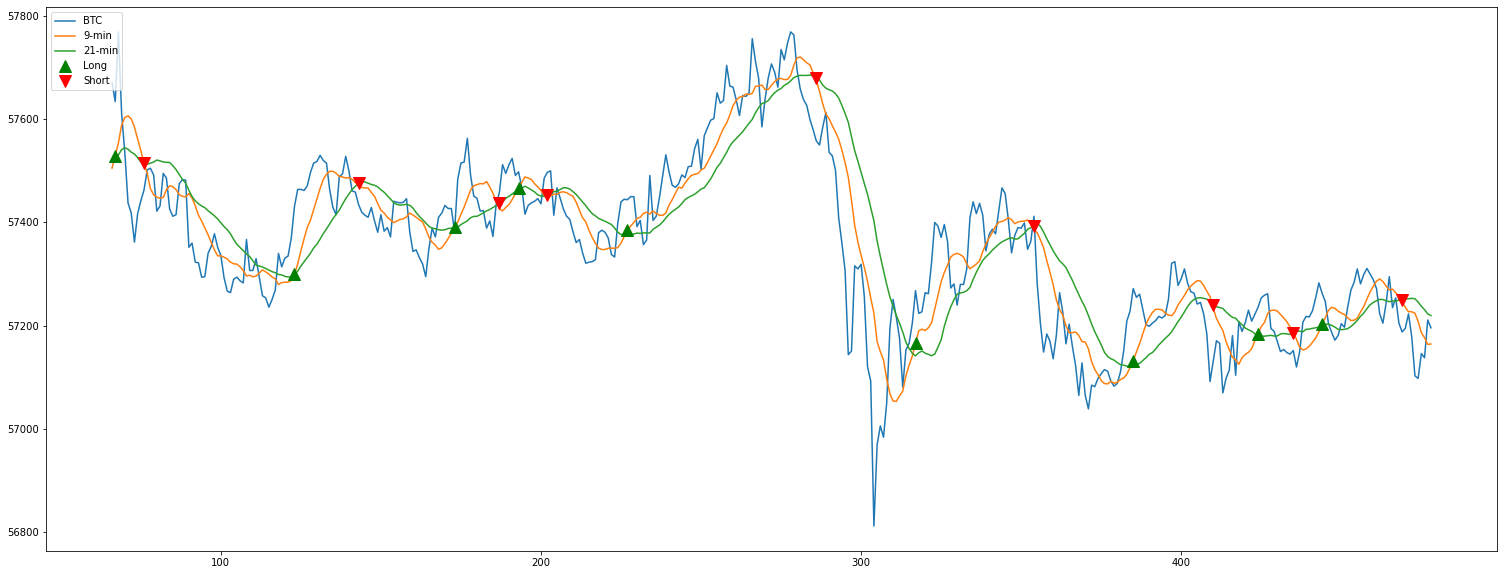

In [5]:

import mpld3

def figureT():

        
        df = pd.read_csv('../data/btcperp1m.csv')
        df.drop(df.columns[[0]], axis=1,inplace=True)
        df1 = Algo.fullstate(df, df)
        df1.dropna(inplace=True)
        df2 = df1
        fig, ax = plt.subplots()
        fig.set_size_inches(26,10)
        plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
        plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
        plt.plot(df2.iloc[-500:]['21-min'], label = '21-min')
        plt.plot(df2[-500:].loc[df2.entry == 2].index, df2[-500:]['9-min'][df2.entry == 2], "^",
                color = "g", markersize = 12, label= "Long")
        plt.plot(df2[-500:].loc[df2.entry == -2].index, df2[-500:]['21-min'][df2.entry == -2], "v",
                color = "r", markersize = 12, label="Short")
        plt.legend(loc=2);
        mpld3.save_html(fig,'C:/Users/tbrid/terminalLogic/web/assets/positionsT.html')
a = figureT()
a

In [ ]:
t = Algo.plot_positionT(df2)
t

# Trend Algo Performance

In [ ]:


trendPlot = Algo.plot_gainzT(df2)
trendPlot

In [ ]:
trendRets = Algo.trend_gainz(df2)
trendRets

# Range positions

In [ ]:
r = Algo.plot_positionR(df2.head(-300))
r
# always long or short never flat

In [ ]:
# p = Algo.plot_percentiles(df2.head(-500))
# p

In [ ]:
sns.set()
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(df2['ratio'].dropna(), percentiles)
df2['ratio'].dropna().plot(legend = True)
fig, ax = plt.subplots()
fig.set_size_inches(26,10)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');


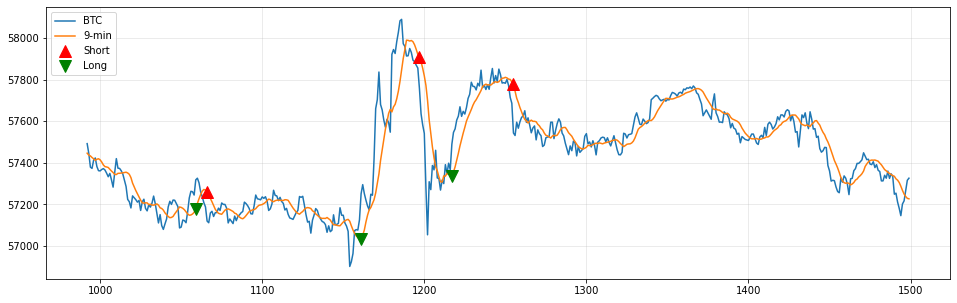

In [14]:
plt.rcParams['figure.figsize'] = 16.2, 5
plt.grid(True, alpha = .3)
plt.plot(df2.iloc[-500:]['close'], label = 'BTC')
plt.plot(df2.iloc[-500:]['9-min'], label = '9-min')
plt.plot(df2[-500:].loc[df2.entryR == 2].index, df2[-500:]['9-min'][df2.entryR == 2], "^",
        color = "r", markersize = 12, label= "Short")
plt.plot(df2[-500:].loc[df2.entryR == -2].index, df2[-500:]['9-min'][df2.entryR == -2], "v",
        color = "g", markersize = 12, label="Long")
plt.legend(loc=2);
plt.savefig('../web/assets/dualPlot.png')


In [ ]:
rangeRet = Algo.market_returnsR(df2)
rangeRet

In [ ]:
rangeRets = Algo.range_gainz(df2)
rangeRets

In [ ]:
bestFit = df2[['time','close', 'market_returns','range_returns', 'trend_returns']]
bestFit.head(30)

In [ ]:
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] > bestFit['trend_returns'],
#                                             bestFit['range_returns'], np.nan)
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] < bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# bestFit['minuteTF_maxVal'] = np.where(bestFit['range_returns'] == bestFit['trend_returns'],
#                                             bestFit['range_returns'], bestFit['minuteTF_maxVal'])
# # bestFit['20m_maxVal'] = bestFit['minuteTF_maxVal'].shift(-20)
# fitList =  bestFit['minuteTF_maxVal'].shift(-20)


* check val in each algo_return, determine greatest val, declear winner
* if declared winner, iterate forward len(X_minutes) in winner col and append new val to list
* check both val at winning location for greatest val, decleare winner
* iterate forward len(X_min) in winning col and append val to list
* repeat, i think..

In [ ]:
count=[]
selectVal = []
greatestVal = []
signal = ''
period = 3

for j, k in bestFit.iterrows():
    count.append(1)    
    if len(count) == period:
        selectVal.append(["time", k['market_returns'], "rangeRet", k['range_returns'], "trendRet", k['trend_returns']])
        if k['range_returns'] > k['trend_returns']:
            signal = -1
            greatestVal.append([ signal, k['range_returns']])
#             selectVal.append([k['range_returns'], signal])
#             np.insert(winnerVal, 1, greatestVal, axis = 1)
        elif k['range_returns'] < k['trend_returns']:
            signal = 1
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        else:
            k['range_returns'] == k['trend_returns']
            signal = 0
            greatestVal.append([signal, k['trend_returns']])
#             selectVal.append([k['trend_returns'], signal])
        count = []

record=np.concatenate((selectVal,greatestVal), axis=1)
record

        
df3 = pd.DataFrame((record),
                     columns=['time', 'market_returns', 'range','rangeRet', 'trend', 'trendRet', 'winningAlgo', 'winnersRets'])   
df3.drop(['range', 'trend'], axis = 1, inplace=True)
record


In [ ]:
df3['addTrend'] = df3['trendRet'].shift(-1)
df3['addRange'] = df3['rangeRet'].shift(-1)
df3['result'] = np.where(df3['trendRet'] > df3['rangeRet'], df3['addTrend'], np.nan)
df3['result'] = np.where(df3['trendRet'] < df3['rangeRet'], df3['addRange'], df3['result'])
df3['result'] = np.where(df3['trendRet'] == df3['rangeRet'], df3['addRange'], df3['result'])
df3

In [ ]:
df3.set_index('rangeRet')
df4 = df3.iloc[:-1 , :]
print(f' Dual Algo Returns over dataset 1minBTC: ', df3['result'].astype('float64').sum())
print(f'Market Buy/Hold Returns for same period: ', np.exp(bestFit.market_returns).astype('float64').cumprod().iloc[-1])
# when i try to sum it concatenates elements as strings, failed to convert to integer val
# also y output col have values that dont seem to be in range with the other values?

In [ ]:
plt.plot(np.exp(df3['market_returns'].dropna().astype('float64')).cumprod(), label='Buy/Hold')
plt.plot(np.exp(df3['result'].dropna().astype('float64')).cumprod(), label='Strategy')
plt.xticks(rotation=90)

In [ ]:
initial_capital = float(100000.0)

# Create df positions
positions = pd.DataFrame(index=df2.time.index).fillna(0.0)


# Buy 2 BTC
positions['BTC-PERP'] = 2*df['position']

# Initilize portfolio w value owned
portfolio = positions.multiply(df['close'], axis=0)

# Store diff in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(df['close'], axis=0)).sum(axis=1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['close'], axis=0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add 'returns' to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['time'] = df['time']
portfolio